# Lab  #3 - Unsupervised Learning

First and Last Name: Janakan Sivaloganathan

Student ID: 500960836

Objective: To explore unsupervised learnign algorithms to cluster similar data.

In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans
import seaborn as sns
import math

In [287]:
# Dataset 1
data = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Dataset 2
df = pd.read_csv('https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/heart.csv')
df.head()

initial_centers = np.array([data[1], data[2], data[7]])

df_test = df[:300]
df_actual = df[300:]

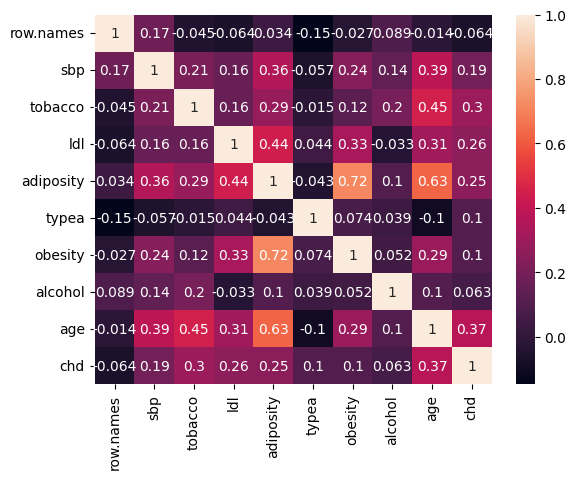

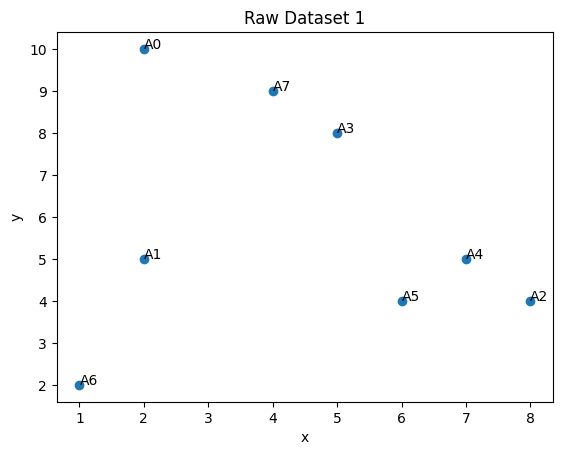

In [288]:
# EDA of dataset_2
corr_matrix = dataset_2.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)

# Plotting original dataset 2
x = [x[0] for x in dataset_1]
y = [y[1] for y in dataset_1]
plt.figure()
plt.plot(x, y, 'o')
plt.ylabel('y')
plt.xlabel('x')
plt.title('Raw Dataset 1')
for i in range(len(dataset_1)):
    plt.annotate(f"A{i}", (dataset_1[i][0], dataset_1[i][1]))
plt.show()

## Implementation Steps

### Part A: Exploratory Data Analysis and K-Means clustering

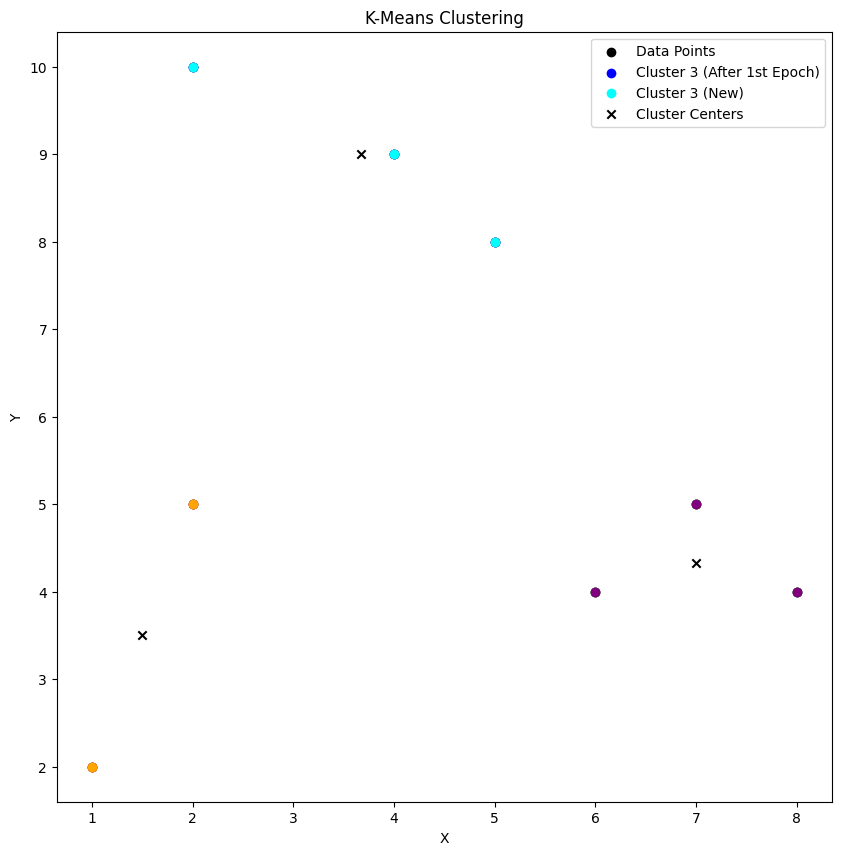

Cluster 1 
 Examples: 
 [[2 5]
 [1 2]]
Cluster 2 
 Examples: 
 [[8 4]
 [7 5]
 [6 4]]
Cluster 3 
 Examples: 
 [[ 2 10]
 [ 5  8]
 [ 4  9]]
Centers of the New Clusters:
Cluster 1 Center: [1.5 3.5]
Cluster 2 Center: [7.         4.33333333]
Cluster 3 Center: [3.66666667 9.        ]


In [289]:
# Assign each data point to the nearest cluster center
def assign_clusters(data, centers):
    num_points = data.shape[0]
    distances = np.zeros((num_points, len(centers)))

    for i in range(num_points):
        for j, center in enumerate(centers):
            distances[i, j] = np.linalg.norm(data[i] - center)

    cluster_assignments = np.argmin(distances, axis=1)

    return cluster_assignments

# Update the cluster centers
def update_centers(data, cluster_assignments, k):
    num_features = data.shape[1]
    centers = np.zeros((k, num_features))

    for i in range(k):
        cluster_points = data[cluster_assignments == i]
        centers[i] = np.mean(cluster_points, axis=0)

    return centers

# K-Means algorithm for one epoch
def kmeans_one_epoch(data, initial_centers):
    centers = initial_centers.copy()
    # Assign data points to clusters
    cluster_assignments = assign_clusters(data, centers)
    # Update cluster centers
    centers = update_centers(data, cluster_assignments, len(initial_centers))
    return cluster_assignments, centers

# K-Means algorithm for multiple epochs until convergence
def kmeans(data, initial_centers):
    centers = initial_centers.copy()
    num_epochs = 0
    converged = False
    cluster_assignments_prev = None
    while not converged:
        # Assign data points to clusters
        cluster_assignments = assign_clusters(data, centers)
        # Check convergence
        if np.array_equal(cluster_assignments, cluster_assignments_prev):
            converged = True
        # Update cluster centers
        centers = update_centers(data, cluster_assignments, len(initial_centers))
        # Print cluster assignments for each epoch
        print(f"Epoch {num_epochs + 1}:")
        for i, point in enumerate(data):
            cluster = cluster_assignments[i] + 1
            print(f"Point {i+1} - Cluster {cluster}")
        # Increment epoch counter
        num_epochs += 1
        cluster_assignments_prev = cluster_assignments.copy()
    return cluster_assignments, centers, num_epochs


# Run K-Means algorithm for one epoch
cluster_assignments, centers = kmeans_one_epoch(data, initial_centers)

# Plotting
plt.figure(figsize=(10, 10))
plt.scatter(data[:, 0], data[:, 1], color='black', label='Data Points')
# Plotting clusters after the first epoch
for i, point in enumerate(data):
    if cluster_assignments[i] == 0:
        plt.scatter(point[0], point[1], color='red', label='Cluster 1 (After 1st Epoch)' if i == 0 else None)
    elif cluster_assignments[i] == 1:
        plt.scatter(point[0], point[1], color='green', label='Cluster 2 (After 1st Epoch)' if i == 0 else None)
    else:
        plt.scatter(point[0], point[1], color='blue', label='Cluster 3 (After 1st Epoch)' if i == 0 else None)
# Initialize cluster centers with seeds A2, A3, and A8
initial_centers = np.array([data[1], data[2], data[7]])
# Run K-Means algorithm for one epoch with new seeds
cluster_assignments, centers = kmeans_one_epoch(data, initial_centers)
# Plotting new clusters (Q3.)
for i, point in enumerate(data):
    if cluster_assignments[i] == 0:
        plt.scatter(point[0], point[1], color='orange', label='Cluster 1 (New)' if i == 0 else None)
    elif cluster_assignments[i] == 1:
        plt.scatter(point[0], point[1], color='purple', label='Cluster 2 (New)' if i == 0 else None)
    else:
        plt.scatter(point[0], point[1], color='cyan', label='Cluster 3 (New)' if i == 0 else None)
plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


# Q1. The new clusters (examples belonging to each cluster)
new_clusters = []
for i in range(len(initial_centers)):
    new_clusters.append(data[cluster_assignments == i])

for i, cluster in enumerate(new_clusters):
    print(f"Cluster {i+1} \n Examples: \n {cluster}")


# Q2. The centers of the new clusters
print("Centers of the New Clusters:")
for i, center in enumerate(centers):
    print(f"Cluster {i+1} Center: {center}")


Epoch 1:
Point 1 - Cluster 3
Point 2 - Cluster 1
Point 3 - Cluster 2
Point 4 - Cluster 3
Point 5 - Cluster 2
Point 6 - Cluster 2
Point 7 - Cluster 1
Point 8 - Cluster 3
Epoch 2:
Point 1 - Cluster 3
Point 2 - Cluster 1
Point 3 - Cluster 2
Point 4 - Cluster 3
Point 5 - Cluster 2
Point 6 - Cluster 2
Point 7 - Cluster 1
Point 8 - Cluster 3


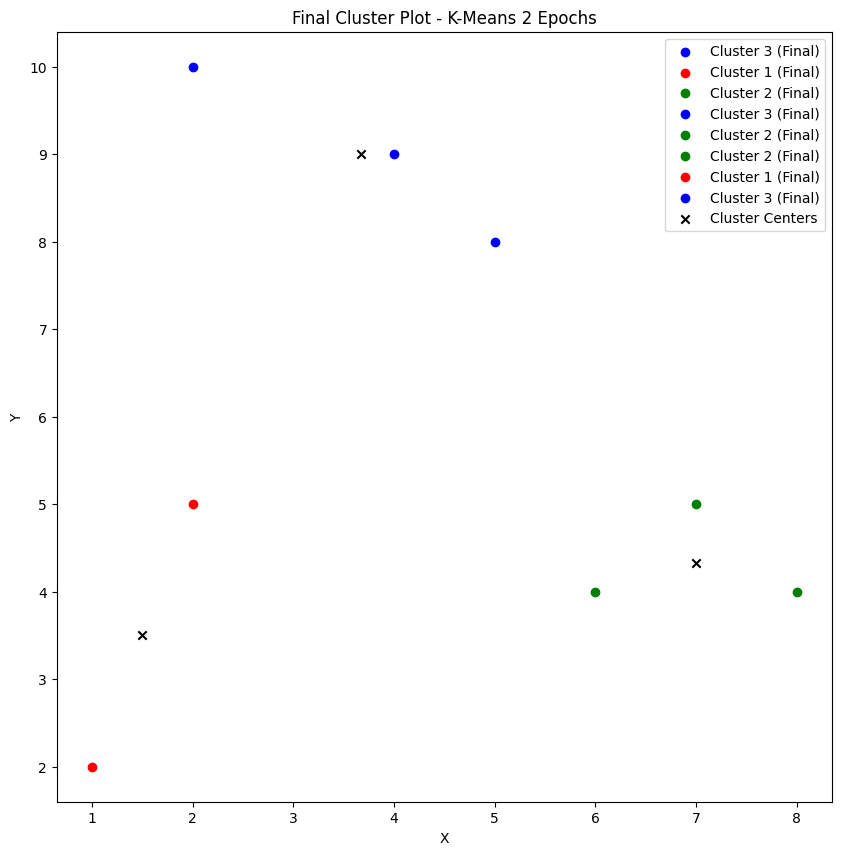

Number of iterations to converge: 2


In [290]:
# Q4. Epochs to convergence and Q5. Final plot
# Run K-Means algorithm until convergence
cluster_assignments, centers, num_epochs = kmeans(data, initial_centers)

# Plotting
plt.figure(figsize=(10, 10))

# Plotting clusters after the final epoch
for i, point in enumerate(data):
    if cluster_assignments[i] == 0:
        plt.scatter(point[0], point[1], color='red', label='Cluster 1 (Final)')
    elif cluster_assignments[i] == 1:
        plt.scatter(point[0], point[1], color='green', label='Cluster 2 (Final)')
    else:
        plt.scatter(point[0], point[1], color='blue', label='Cluster 3 (Final)')

plt.scatter(centers[:, 0], centers[:, 1], color='black', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Final Cluster Plot - K-Means 2 Epochs')
plt.legend()
plt.show()

print(f"Number of iterations to converge: {num_epochs}")

Training accuracy: 0.36666666666666664
Testing accuracy: 0.30864197530864196


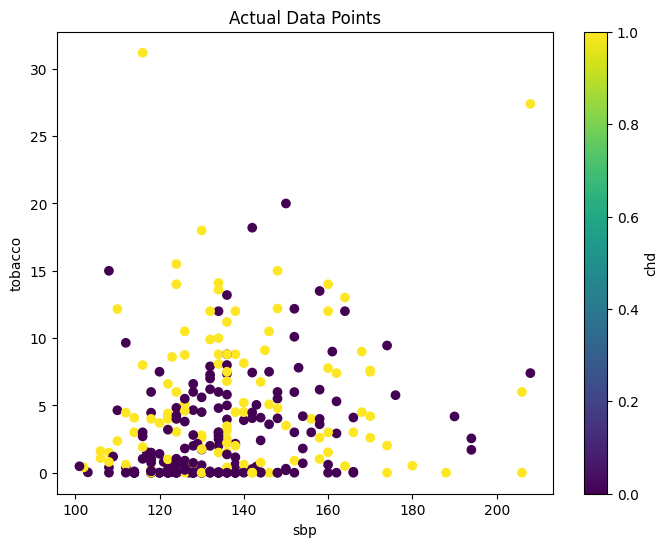

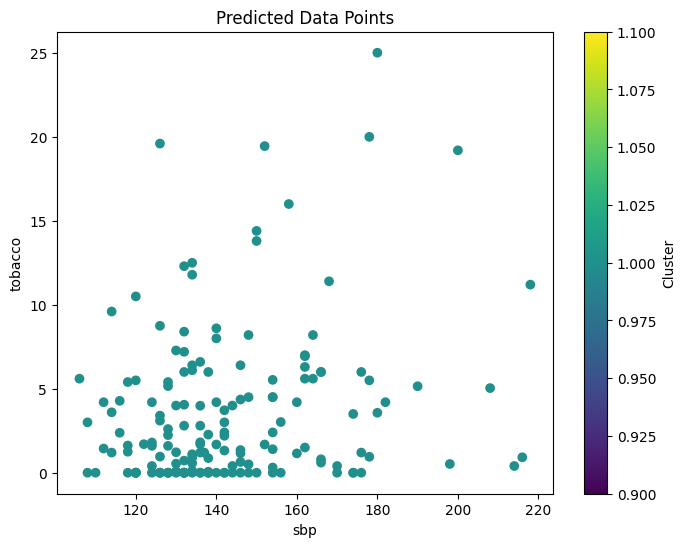

In [295]:
# Select features for clustering
features = ['sbp', 'tobacco']
data = df[features].values

# Separate training and testing data
train_data = data[:300]
test_data = data[300:]

# K-Means algorithm
def kmeans(data, k, num_epochs):
    num_samples, num_features = data.shape

    # Initialize cluster centers randomly
    np.random.seed(42)
    centers = np.random.randn(k, num_features)

    for epoch in range(num_epochs):
        # Step 1: Assign each data point to the nearest cluster center
        cluster_assignments = assign_clusters(data, centers)

        # Step 2: Update the cluster centers
        centers = update_centers(data, cluster_assignments, k)

    return cluster_assignments, centers

# Step 1: Assign each data point to the nearest cluster center
def assign_clusters(data, centers):
    num_samples = data.shape[0]
    distances = np.zeros((num_samples, len(centers)))

    for i in range(num_samples):
        for j, center in enumerate(centers):
            distances[i, j] = np.linalg.norm(data[i] - center)

    cluster_assignments = np.argmin(distances, axis=1)

    return cluster_assignments

# Step 2: Update the cluster centers
def update_centers(data, cluster_assignments, k):
    num_features = data.shape[1]
    centers = np.zeros((k, num_features))

    for i in range(k):
        cluster_points = data[cluster_assignments == i]
        if len(cluster_points) > 0:
            centers[i] = np.mean(cluster_points, axis=0)
        else:
            centers[i] = np.zeros(num_features)
    return centers

# Perform K-Means clustering
k = 2
num_epochs = 10
cluster_assignments, centers = kmeans(train_data, k, num_epochs)

# Assign cluster labels to training and testing data
train_labels = cluster_assignments
test_labels = assign_clusters(test_data, centers)

# Q6: Accuracy calculation
train_true_labels = df['chd'].values[:300]  # Ground truth labels for training data
test_true_labels = df['chd'].values[300:]  # Ground truth labels for testing data
train_accuracy = np.mean(train_true_labels == train_labels)
test_accuracy = np.mean(test_true_labels == test_labels)
print(f"Training accuracy: {train_accuracy}")
print(f"Testing accuracy: {test_accuracy}")

# Q7: Plot 'sbp' vs 'tobacco' with actual data points
plt.figure(figsize=(8, 6))
plt.scatter(df['sbp'][:300], df['tobacco'][:300], c=df['chd'][:300], cmap='viridis')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Actual Data Points')
plt.colorbar(label='chd')
plt.show()

# Q8: Plot 'sbp' vs 'tobacco' with predicted data points
plt.figure(figsize=(8, 6))
plt.scatter(df['sbp'][300:], df['tobacco'][300:], c=test_labels, cmap='viridis')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Predicted Data Points')
plt.colorbar(label='Cluster')
plt.show()

We calculate the accuracy by comparing the ground truth labels with the cluster assignments for both the training and testing data. The accuracy is calculated as the percentage of correct assignments. The plots in Q7 and Q8 show the 'sbp' vs 'tobacco' with actual and predicted data points, respectively, colored based on the 'chd' class and cluster assignments.

### Part B: Perform Nearest Neighbor Clustering Algorithm using Euclidean Distance

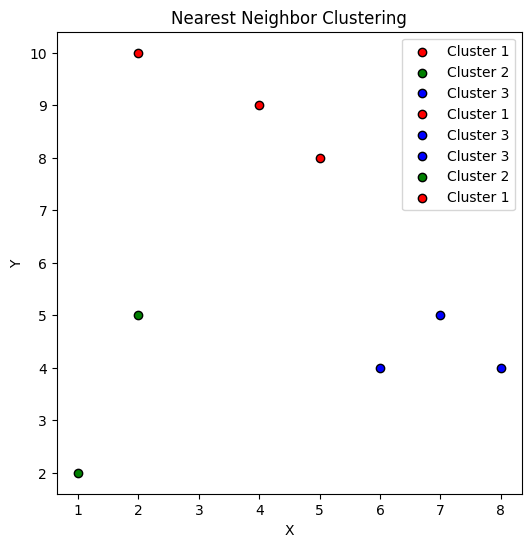

Accuracy: 56.17%


In [303]:
# Reinitiatlize the dataset
data = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Nearest Neighbor clustering algorithm
def nn_clustering(data, threshold):
    num_samples = data.shape[0]
    clusters = [-1] * num_samples  # Cluster assignments, -1 indicates unassigned
    cluster_count = 0  # Current cluster count

    for i in range(num_samples):
        if clusters[i] == -1:  # Unassigned data point
            clusters[i] = cluster_count  # Assign to a new cluster
            cluster_count += 1

        for j in range(num_samples):
            if i != j and clusters[j] == -1:  # Unassigned data point
                dist = np.linalg.norm(data[i] - data[j])  # Euclidean distance
                if dist <= threshold:
                    clusters[j] = clusters[i]  # Assign to the same cluster

    return clusters

# Perform Nearest Neighbor clustering
threshold = 4
clusters = nn_clustering(data, threshold)

# Q9. Are the same results the same that was gotten from K-Means?
# The results for the plot from the k-means algorithm shows the same result.

# Q10. Give the final plot for NN clustering
# Plotting the clusters
plt.figure(figsize=(6, 6))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5', 'Cluster 6', 'Cluster 7', 'Cluster 8']
for i, point in enumerate(data):
    cluster = clusters[i]
    plt.scatter(point[0], point[1], color=colors[cluster], edgecolor='black', label=labels[cluster])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Nearest Neighbor Clustering')
plt.legend()
plt.show()


# Q11. Performance comparison of K-means and nearest neigbour clustering algorithms. Display the disadvantages of the algorithms.
# Performance Comparison:
# K-means clustering is an iterative algorithm that aims to minimize the within-cluster sum of squares, seeking a local optimum. It converges to a solution but can be sensitive to the initial cluster centroids and may get stuck in suboptimal solutions.
# Nearest Neighbor (NN) clustering assigns each data point to a cluster based on its nearest neighbor within a threshold distance. It is a simple algorithm but can be affected by noise and outliers.
# Disadvantages on Bigger Datasets:
# K-means clustering:
# Scalability: As the dataset size increases, the computational cost of K-means also increases significantly. It requires calculating distances between each data point and each cluster center, resulting in a quadratic time complexity.
# Memory Usage: K-means requires storing the entire dataset and cluster centers in memory, which can be a limitation for large datasets that cannot fit into memory. Sensitivity to Initialization: K-means can be sensitive to the initial selection of cluster centroids, leading to different results for different initializations. It requires careful initialization techniques to obtain optimal results.
# Nearest Neighbor (NN) clustering:
# Computational Complexity: Nearest Neighbor clustering involves comparing each data point to all other data points, resulting in a time complexity of O(N^2), where N is the number of data points. As the dataset size increases, the computational cost becomes prohibitive. Threshold Selection: The performance of NN clustering is highly dependent on the threshold distance. Choosing an appropriate threshold value can be challenging, especially for datasets with varying densities or irregular clusters.
# Noise Sensitivity: NN clustering is sensitive to noise and outliers, as it assigns data points solely based on proximity. Outliers or noisy points may result in incorrect cluster assignments or the formation of undesired clusters.

# Disadvantages of K-Means from lectures and research:
# 1. Sensitive to initial cluster centers.
# 2. May converge to local optima depending on initialization.
# 3. Assumes clusters are convex and isotropic.

# Disadvantages of Nearest Neighbor from lectures and research:
# 1. Computationally expensive for large datasets.
# 2. No explicit optimization objective.
# 3. Lack of interpretability.

# Q12. Accuracy
# Extract 'sbp', 'tobacco', and 'chd' columns
df = df[['sbp', 'tobacco', 'chd']]

# Split the data into training and testing sets
train_data = df.iloc[:300]
test_data = df.iloc[300:]

# Nearest Neighbor clustering algorithm
def nn_clustering(train_data, test_data, threshold):
    clusters = []
    for i in range(len(test_data)):
        min_dist = np.inf
        min_cluster = None
        for j in range(len(train_data)):
            dist = np.sqrt((test_data.iloc[i]['sbp'] - train_data.iloc[j]['sbp']) ** 2 +
                           (test_data.iloc[i]['tobacco'] - train_data.iloc[j]['tobacco']) ** 2)
            if dist < min_dist:
                min_dist = dist
                min_cluster = train_data.iloc[j]['chd']
        clusters.append(min_cluster)
    return clusters

# Perform Nearest Neighbor clustering
threshold = 4
clusters = nn_clustering(train_data, test_data, threshold)

# Calculate accuracy
accuracy = sum(clusters == test_data['chd']) / len(test_data) * 100

# Print accuracy
print(f"Accuracy: {accuracy:.2f}%")

### Part C: Perform DBScan Algorithm using Euclidean Distance where Epsilon = 2 and minpoint = 2

In [ ]:
def db_scan_algorithm():
    pass

# Q13. Provide the final cluster plot

# Q14. Perform the DBScan for Epsilon root 10 and provide the cluster plot

# Q15. Provide accuracy and compare K-means, NN, and DBScan clustering performance for Dataset 1 and Dataset 2


### Part D: Use SKLearn to verify results for K-Means, Nearest Neighbor, and DBScan

/Users/janakansivaloganathan/miniconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


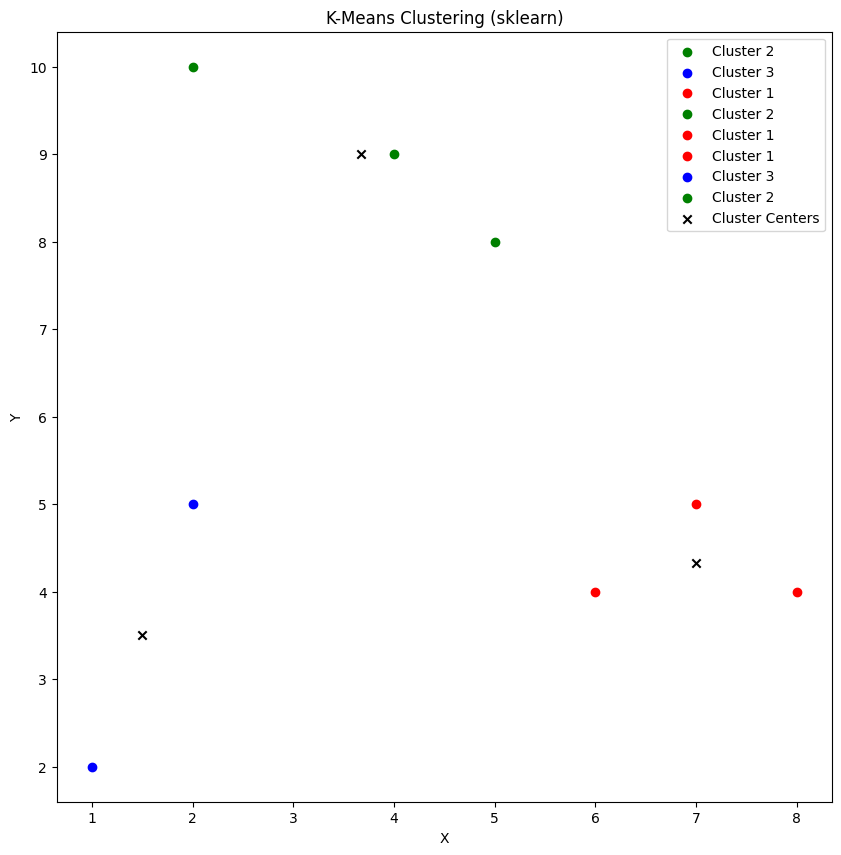

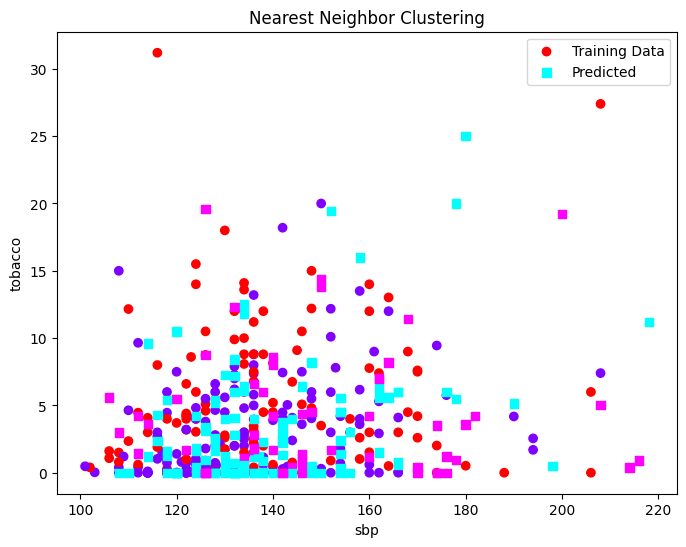

Accuracy: 59.26%


In [305]:
# Q16. Observations and comparisons

# K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)

# Fit the data to the KMeans model
kmeans.fit(data)

# Get the cluster labels and cluster centers
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

# Plotting
plt.figure(figsize=(10, 10))

# Plotting clusters
for i, point in enumerate(data):
    if cluster_labels[i] == 0:
        plt.scatter(point[0], point[1], color='red', label='Cluster 1')
    elif cluster_labels[i] == 1:
        plt.scatter(point[0], point[1], color='green', label='Cluster 2')
    else:
        plt.scatter(point[0], point[1], color='blue', label='Cluster 3')

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', label='Cluster Centers')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering (sklearn)')
plt.legend()
plt.show()

# DBScan clustering


# Nearest Neighbours
df = df[['sbp', 'tobacco', 'chd']]

# Split the data into training and testing sets
train_data = df.iloc[:300]
test_data = df.iloc[300:]

# Perform Nearest Neighbor clustering using scikit-learn
X_train = train_data[['sbp', 'tobacco']]
y_train = train_data['chd']
X_test = test_data[['sbp', 'tobacco']]
y_test = test_data['chd']

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

# Calculate accuracy using scikit-learn
accuracy = accuracy_score(y_test, predictions) * 100

# Plotting the data points with cluster assignments
plt.figure(figsize=(8, 6))
plt.scatter(train_data['sbp'], train_data['tobacco'], c=train_data['chd'], cmap='rainbow', label='Training Data')
plt.scatter(X_test['sbp'], X_test['tobacco'], c=predictions, cmap='cool', marker='s', label='Predicted')
plt.xlabel('sbp')
plt.ylabel('tobacco')
plt.title('Nearest Neighbor Clustering')
plt.legend()
plt.show()

# Print accuracy
print(f"Accuracy: {accuracy:.2f}%")

# Verify the results for Dataset 1

# Verify the results for Dataset 2


#### Overall Observations and Comparisons

## Questions
### What are the different metrics used to evaluate the performance of different clustering algorithms?

Different metrics used to evaluate the performance of clustering algorithms include silhouette score, Davies-Bouldin index, and adjusted Rand index. The silhouette score measures how similar an object is to its own cluster compared to other clusters, with values ranging from -1 to 1, where a higher score indicates better clustering. The Davies-Bouldin index evaluates the average similarity between each cluster and its most similar cluster, with lower values indicating better clustering. The adjusted Rand index measures the similarity between two clusterings, considering all pairs of samples and accounting for chance. These metrics offer comprehensive insights into the quality of clustering results beyond simple accuracy assessment.


### Instead of accuracy, what other ways can we evaluate the performance of three algorithms in lab 3?

In addition to accuracy, clustering algorithms in this experiment can be evaluated using metrics such as completeness, homogeneity, and V-measure. Completeness measures whether all members of a given class are assigned to the same cluster, homogeneity evaluates if each cluster contains only members of a single class, and V-measure is the harmonic mean of completeness and homogeneity. These metrics are particularly useful when dealing with datasets with known ground truth labels and provide a more nuanced understanding of the clustering performance in terms of both cluster purity and class assignment consistency.